# **The Iris dataset in scikit-learn**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
Iris = pd.read_csv('Iris.csv')
samples = Iris.drop(['Id','Species','Species_2'], axis=1).values
species = Iris['Species'].values

In [ ]:
# k-means clustering
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = model.predict(samples)
labels
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
# Cluster labels for new samples
new_samples = [[ 5.7 ,4.4 ,1.5 ,0.4],
               [ 6.5 ,3.  ,5.5 ,1.8],
               [ 5.8 ,2.7 ,5.1 ,1.9]]
new_labels = model.predict(new_samples)
print(new_labels)               

[0 2 1]


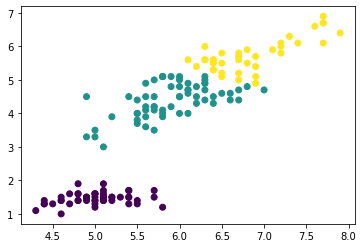

In [ ]:
# Scatter plots
import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels)
plt.show()

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

# **Evaluating a clustering**

In [ ]:
# Aligning labels and species
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)

     labels    species
0         0     setosa
1         0     setosa
2         0     setosa
3         0     setosa
4         0     setosa
..      ...        ...
145       2  virginica
146       1  virginica
147       2  virginica
148       2  virginica
149       1  virginica

[150 rows x 2 columns]


In [ ]:
# Crosstab of labels and species
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          48         14
2             0           2         36


In [ ]:
# Inertia measures clustering quality
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

78.94084142614602


# **Transforming features for better clusterings**

In [ ]:
import pandas as pd
wine = pd.read_csv('wine.csv')
samples = wine.drop(['class_label','class_name'], axis=1).values
varieties = wine['class_name'].values

In [ ]:
samples

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [ ]:

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20


In [ ]:
# sklearn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

In [ ]:
# Pipelines combine multiple steps
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
labels2 = pipeline.predict(samples)

In [ ]:
df2 = pd.DataFrame({'labels': labels2, 'varieties': varieties})
ct = pd.crosstab(df2['labels'], df2['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0                0       0          65
1                0      59           3
2               48       0           3


In [ ]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20


# **Visualizing hierarchies**

A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

In [ ]:
import pandas as pd
wheat = pd.read_csv('wheat.csv')
samples = wheat.drop(['varieties'], axis=1).values
varieties = wheat['varieties'].values

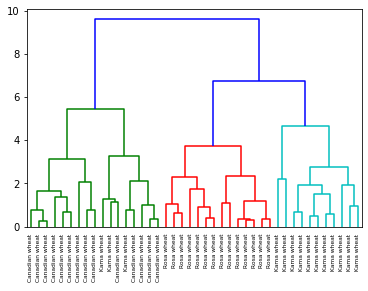

In [ ]:
# Hierarchical clustering with SciPy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 6, criterion='distance')
print(labels)

[3 3 3 3 3 1 3 3 1 3 3 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [ ]:
import pandas as pd
pairs = pd.DataFrame({'labels': labels, 'countries': varieties})
print(pairs.sort_values('labels'))

    labels        countries
41       1   Canadian wheat
28       1   Canadian wheat
29       1   Canadian wheat
30       1   Canadian wheat
12       1       Kama wheat
31       1   Canadian wheat
40       1   Canadian wheat
33       1   Canadian wheat
32       1   Canadian wheat
34       1   Canadian wheat
35       1   Canadian wheat
5        1       Kama wheat
36       1   Canadian wheat
37       1   Canadian wheat
38       1   Canadian wheat
39       1   Canadian wheat
8        1       Kama wheat
27       2       Rosa wheat
26       2       Rosa wheat
25       2       Rosa wheat
24       2       Rosa wheat
23       2       Rosa wheat
20       2       Rosa wheat
21       2       Rosa wheat
19       2       Rosa wheat
18       2       Rosa wheat
17       2       Rosa wheat
16       2       Rosa wheat
15       2       Rosa wheat
14       2       Rosa wheat
22       2       Rosa wheat
1        3       Kama wheat
2        3       Kama wheat
3        3       Kama wheat
4        3       Kam

# **t-SNE for 2-dimensional maps**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
Iris = pd.read_csv('Iris.csv')
samples = Iris.drop(['Id','Species','Species_2'], axis=1).values
species = Iris['Species_2'].values

In [ ]:
species

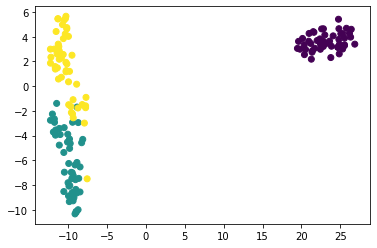

In [ ]:
# t-SNE in sklearn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()
# labels

# **Using scikit-learn PCA**

In [ ]:
# Using scikit-learn PCA
import pandas as pd
wine = pd.read_csv('wine.csv')
samples = wine[['total_phenols','od280']].values

In [ ]:
samples

array([[2.8 , 3.92],
       [2.65, 3.4 ],
       [2.8 , 3.17],
       [3.85, 3.45],
       [2.8 , 2.93],
       [3.27, 2.85],
       [2.5 , 3.58],
       [2.6 , 3.58],
       [2.8 , 2.85],
       [2.98, 3.55],
       [2.95, 3.17],
       [2.2 , 2.82],
       [2.6 , 2.9 ],
       [3.1 , 2.73],
       [3.3 , 3.  ],
       [2.85, 2.88],
       [2.8 , 2.65],
       [2.95, 2.57],
       [3.3 , 2.82],
       [2.7 , 3.36],
       [3.  , 3.71],
       [2.41, 3.52],
       [2.61, 4.  ],
       [2.48, 3.63],
       [2.53, 3.82],
       [2.63, 3.2 ],
       [2.85, 3.22],
       [2.4 , 2.77],
       [2.95, 3.4 ],
       [2.65, 3.59],
       [3.  , 2.71],
       [2.86, 2.88],
       [2.42, 2.87],
       [2.95, 3.  ],
       [2.35, 2.87],
       [2.7 , 3.47],
       [2.6 , 2.78],
       [2.45, 2.51],
       [2.4 , 2.69],
       [3.  , 3.53],
       [3.15, 3.38],
       [2.45, 3.  ],
       [3.25, 3.56],
       [2.64, 3.  ],
       [3.  , 3.35],
       [2.85, 3.33],
       [3.25, 3.44],
       [3.1 ,

In [ ]:
samples

In [ ]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
transformed = model.transform(samples)

In [ ]:
print(transformed)

[[-1.32771994e+00  4.51396070e-01]
 [-8.32496068e-01  2.33099664e-01]
 [-7.52168680e-01 -2.94789161e-02]
 [-1.64026613e+00 -6.55724013e-01]
 [-5.67992278e-01 -1.83358911e-01]
 [-8.07948468e-01 -5.95331030e-01]
 [-8.74453372e-01  4.63619912e-01]
 [-9.38570037e-01  3.86879744e-01]
 [-5.06600144e-01 -2.34652243e-01]
 [-1.15919131e+00  7.60321086e-02]
 [-8.48343677e-01 -1.44589167e-01]
 [-9.88781053e-02  2.06553762e-01]
 [-4.16736898e-01 -4.91135760e-02]
 [-6.06861937e-01 -5.41812743e-01]
 [-9.42293719e-01 -5.22178083e-01]
 [-5.61680527e-01 -2.53787328e-01]
 [-3.53119809e-01 -3.62885573e-01]
 [-3.87902672e-01 -5.29289156e-01]
 [-8.04161418e-01 -6.37588080e-01]
 [-8.33858333e-01  1.69082914e-01]
 [-1.29479891e+00  1.63270739e-01]
 [-7.70704274e-01  4.94216064e-01]
 [-1.26729041e+00  6.48495720e-01]
 [-9.00000123e-01  5.11026278e-01]
 [-1.07786477e+00  5.94477857e-01]
 [-6.66192400e-01  1.20214368e-01]
 [-8.22597096e-01 -3.57906674e-02]
 [-1.88741351e-01  2.10150947e-02]
 [-1.02484606e+00  2

In [ ]:
# Principal components
print(model.components_)

[[-0.64116665 -0.76740167]
 [-0.76740167  0.64116665]]


# **Intrinsic dimension**

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
Iris = pd.read_csv('Iris.csv')
samples = Iris.drop(['Id','Species','Species_2','PetalWidthCm'], axis=1).values
#species = Iris['Species'].values
species = Iris['Species_2'].values

In [ ]:
species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
samples

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [ ]:
# Plotting the variances of PCA features
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
features = range(pca.n_components_)

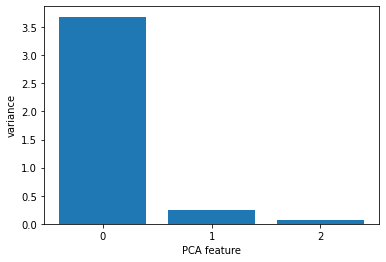

In [ ]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
transformed = pca.transform(samples)
print(transformed.shape)

(150, 2)


In [ ]:
print(species.shape)

(150,)


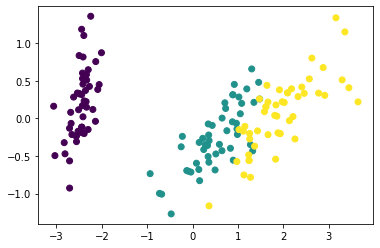

In [ ]:
import matplotlib.pyplot as plt
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()

# **333**

# **444**

# **444**

# **555**

# **555**

# **666**

# **666**

# **131313**

# **777**

# **888**

# **888**

# **777**

# **999**

# **121212**

# **999**

# **101010**

# **101010**

# **111111**

# **111111**

# **121212**

# **131313**

# **141414**

0.7112260057484923

# **141414**

0.7112260057484923